In [1]:
%matplotlib inline
import os
import re
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import pyGadget

In [2]:
from matplotlib.colors import LogNorm

In [3]:
sns.set(context='poster', style='white', font='serif', font_scale=1.)
mpl.rc('text', usetex=True)
#mpl.rc('font', size=20.)
#mpl.rc('font', family='serif')
#mpl.rc('text', usetex=True)

In [4]:
#snap.close()
sim = pyGadget.sim.Simulation('stampede/halo2_vanilla',length='pc',refine=False,coordinates='physical',units_over_h=False)
snap = sim.load_snapshot(147)

In [5]:
snap.gas.load_masses()
snap.gas.load_number_density()
snap.gas.calculate_temperature()
snap.gas.load_coords()
snap.gas.cleanup('masses', 'ndensity', 'temperature', 'coordinates', 'r_sph')
snap.dm.load_masses()
snap.dm.load_coords()

In [6]:
snap.gas.describe()

,masses,ndensity,temperature,x,y,z
count,11035050.000000,11035050.000000,11035050.000000,11035050.000000,11035050.000000,11035050.000000
mean,0.023163,42.835305,535.940242,360.484201,398.043568,393.164445
std,0.069674,374.829868,543.011404,89.636628,91.372319,74.545350
min,0.014425,0.001031,10.003284,0.000000,0.000000,0.000000
25%,0.014425,0.156957,184.387773,293.775681,355.582643,349.234590
50%,0.014425,0.496284,370.542938,369.539117,390.919624,388.763315
75%,0.014425,1.572909,700.527175,417.752539,467.723195,439.036451
max,0.923173,9983.994080,10886.795608,742.376337,740.166037,760.618913


In [7]:
snap.dm.describe()

,masses,x,y,z
count,1.390580e+05,139058.000000,139058.000000,139058.000000
mean,1.200125e+01,296.875531,336.539432,323.270305
std,1.487704e-11,137.014769,146.298042,115.356223
min,1.200125e+01,0.009059,0.020067,0.011186
25%,1.200125e+01,198.139717,251.854019,255.799536
50%,1.200125e+01,307.773189,336.370730,323.144366
75%,1.200125e+01,381.043941,442.954258,398.020578
max,1.200125e+01,623.310316,623.344683,623.325252


In [8]:
center = snap.gas.iloc[snap.gas.ndensity.argmax()][['x', 'y', 'z']]
print center.x, center.y, center.z
center.values

370.433733734 374.177892658 382.262917075


array([ 370.43373373,  374.17789266,  382.26291707])

In [9]:
gb = snap.gas.groupby(snap.gas.masses)

In [10]:
gb.count()

,ndensity,temperature,x,y,z
masses,,,,,
0.014425,10566936,10566936,10566936,10566936,10566936
0.115397,407253,407253,407253,407253,407253
0.923173,60861,60861,60861,60861,60861


In [11]:
gb.max()

,ndensity,temperature,x,y,z
masses,,,,,
0.014425,9983.994080,10886.795608,584.077755,583.828890,592.185030
0.115397,1.543499,7519.507106,677.286147,668.585557,689.034750
0.923173,2.775006,3866.670859,742.376337,740.166037,760.618913


In [12]:
gb.min()

,ndensity,temperature,x,y,z
masses,,,,,
0.014425,0.001103,10.003350,160.168531,160.290294,169.809876
0.115397,0.001066,10.003284,70.478622,77.045702,81.720375
0.923173,0.001031,10.003284,0.000000,0.000000,0.000000


In [13]:
gb.median()

,ndensity,temperature,x,y,z
masses,,,,,
0.014425,0.537725,384.604001,369.558835,390.602265,388.602896
0.115397,0.094437,103.425562,367.797101,436.588257,397.306076
0.923173,0.072374,79.146299,332.495365,438.492877,407.398096


In [14]:
masses = gb.groups.keys()
masses.sort()
masses

[0.014424585038324318, 0.11539668030659454, 0.92317344245275634]

In [15]:
#cmaps = ['Greys_r', 'Blues_r', 'Greens_r', 'Reds_r', 'Oranges_r', 'Purples_r']
cmaps = [sns.cubehelix_palette(len(masses), start=x, as_cmap=True, reverse=False, rot=0) 
         for x in np.linspace(0,3,len(masses)+1)[:-1]]

In [16]:
N=250
rbins = np.logspace(-1,5,N)
nbins = np.logspace(-4,12,N)
tbins = np.logspace(1,np.log10(2e4),N)

/home/jhummel/anaconda/lib/python2.7/site-packages/matplotlib/image.py:359: UserWarning: Images are not supported on non-linear axes.
  warnings.warn("Images are not supported on non-linear axes.")


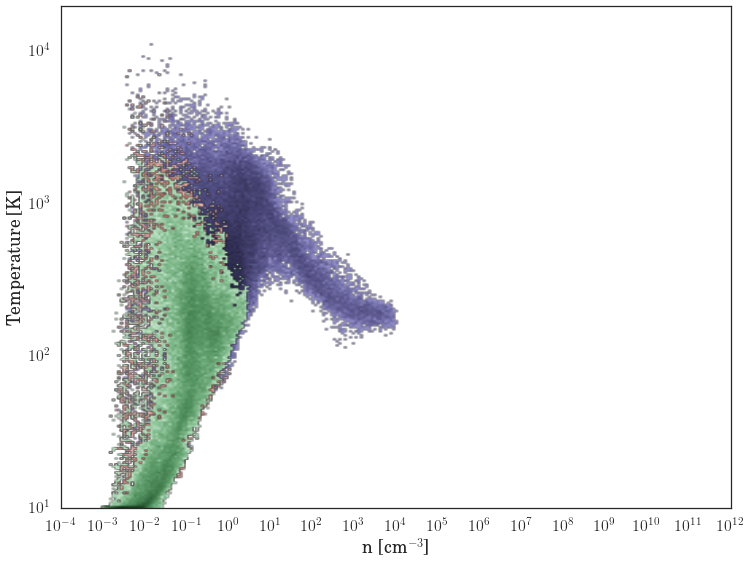

In [17]:
fig,ax = plt.subplots(figsize=(12,9))
for i, mass in enumerate(masses):
    df = gb.get_group(mass)
    heatmap, xedges, yedges = np.histogram2d(df.temperature, df.ndensity, bins=(tbins,nbins))
    extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
    ax.imshow(heatmap, origin='lower', norm=LogNorm(), extent=extent, cmap=cmaps[i])
ax.set(xscale='log', yscale='log', aspect='auto')
ax.set_xlabel('n [cm$^{-3}$]')
ax.set_ylabel('Temperature [K]')
plt.savefig('figures/refinement/T-n_levels.png', bbox_inches='tight')

In [18]:
masses#[:1]

[0.014424585038324318, 0.11539668030659454, 0.92317344245275634]

In [19]:
N = 750
xbins = np.linspace(snap.gas.x.min(), snap.gas.x.max(), N)
ybins = np.linspace(snap.gas.y.min(), snap.gas.y.max(), N)
zbins = np.linspace(snap.gas.z.min(), snap.gas.z.max(), N)

[0.0, 740.16603733253271, 0.0, 742.37633680321812]


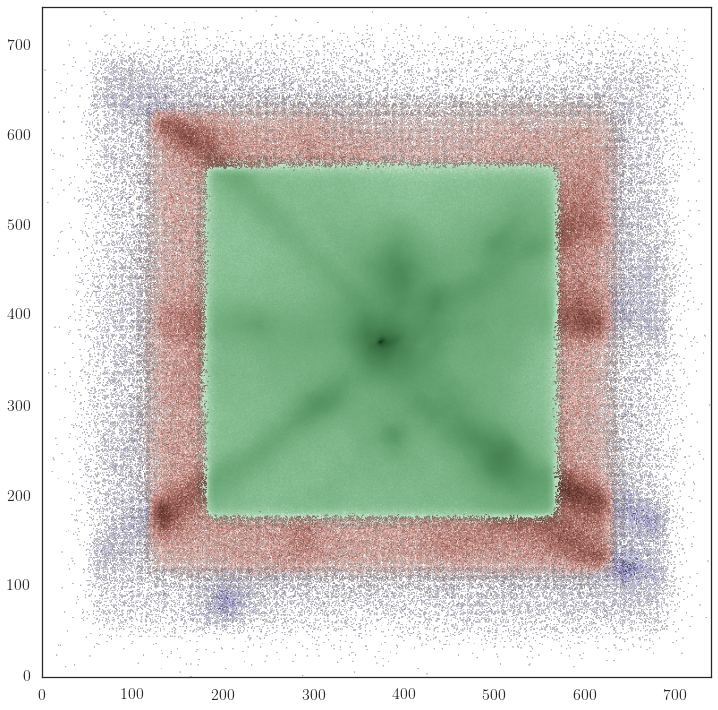

In [20]:
fig,ax = plt.subplots(figsize=(12,12))
for i, mass in enumerate(masses[::-1]):
    df = gb.get_group(mass)
    heatmap, xedges, yedges = np.histogram2d(df.x, df.y, bins=(xbins,ybins))
    extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
    ax.imshow(heatmap, origin='lower', norm=LogNorm(), extent=extent, cmap=cmaps[i])
ax.set_aspect('auto')
print extent
plt.savefig('figures/refinement/levels.png', bbox_inches='tight')

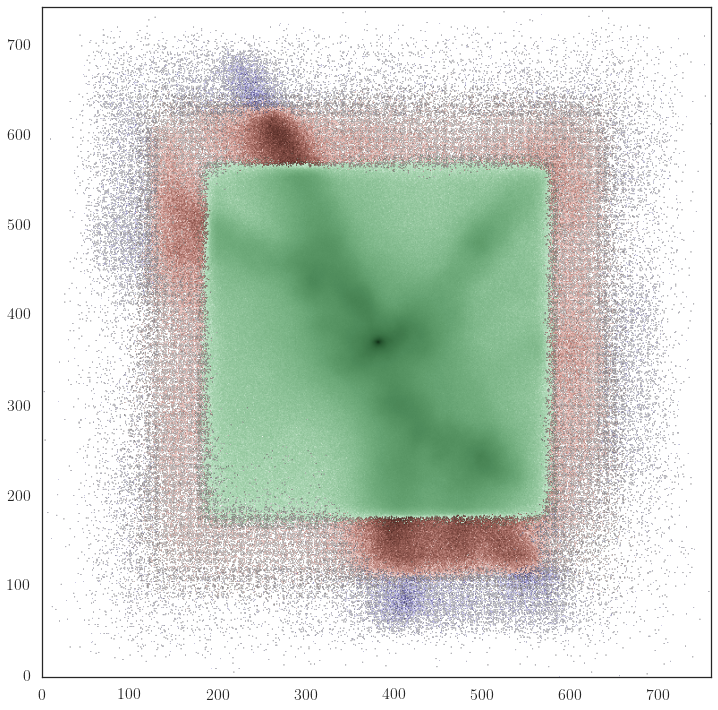

In [21]:
fig,ax = plt.subplots(figsize=(12,12))
for i, mass in enumerate(masses[::-1]):
    df = gb.get_group(mass)
    heatmap, xedges, yedges = np.histogram2d(df.x, df.z, bins=(xbins,zbins))
    extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
    ax.imshow(heatmap, origin='lower', norm=LogNorm(), extent=extent, cmap=cmaps[i])
ax.set_aspect('auto')

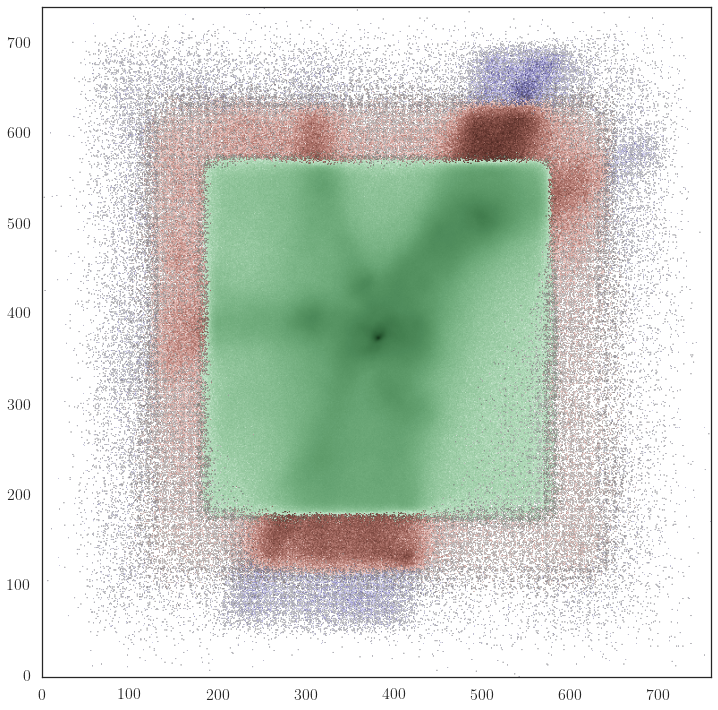

In [22]:
fig,ax = plt.subplots(figsize=(12,12))
for i, mass in enumerate(masses[::-1]):
    df = gb.get_group(mass)
    heatmap, xedges, yedges = np.histogram2d(df.y, df.z, bins=(ybins,zbins))
    extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
    ax.imshow(heatmap, origin='lower', norm=LogNorm(), extent=extent, cmap=cmaps[i])
ax.set_aspect('auto')

In [23]:
masses

[0.014424585038324318, 0.11539668030659454, 0.92317344245275634]

In [24]:
df = gb.get_group(masses[2])
df.describe()

,ndensity,temperature,x,y,z
count,60861.000000,60861.000000,60861.000000,60861.000000,60861.000000
mean,0.162082,142.486970,343.584216,400.149771,395.155618
std,0.268040,202.364996,212.344102,230.468589,177.978141
min,0.001031,10.003284,0.000000,0.000000,0.000000
25%,0.016198,15.912661,125.628237,150.180804,251.104015
50%,0.072374,79.146299,332.495365,438.492877,407.398096
75%,0.177633,187.656375,544.418044,635.580089,543.915704
max,2.775006,3866.670859,742.376337,740.166037,760.618913


In [30]:
df[df.y > 300][df.y < 400][df.z > 300][df.z<400][df.x < 400].describe()

/home/jhummel/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,ndensity,temperature,x,y,z
count,121.000000,121.000000,121.000000,121.000000,121.000000
mean,0.019514,240.222906,89.927333,341.901578,365.159439
std,0.021578,337.261573,25.845789,30.944349,30.337065
min,0.002550,10.003421,12.054049,300.626267,300.206571
25%,0.004212,10.634256,75.512247,313.770838,342.352272
50%,0.009151,30.162695,93.782534,331.984377,375.584789
75%,0.028195,402.712630,110.440499,369.876013,390.257597
max,0.094520,1715.690281,121.646230,399.567806,399.732673


In [31]:
df.ndensity.mean()

0.16208232199976697

In [32]:
df.temperature.mean()

142.48697040057192

In [45]:
cs = np.sqrt(pyGadget.constants.k_B * df.temperature.mean() / pyGadget.constants.m_H)
cs/1e5

1.0844897821640629

In [44]:
cs / 3.086e18 * 365.25*24*3600 * 410294.48042362183

0.45501863624006217

In [39]:
365.25*24*3600

31557600.0